In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [87]:
# Reading the dataset
df = pd.read_csv("F:\\Vikas\\codebasics exercise\\py-master\\ML\\19_Bagging\\Exercise\\heart.csv")

In [88]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 86.1+ KB


In [90]:
df.shape

(918, 12)

In [91]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [94]:
describe_df = df.describe()

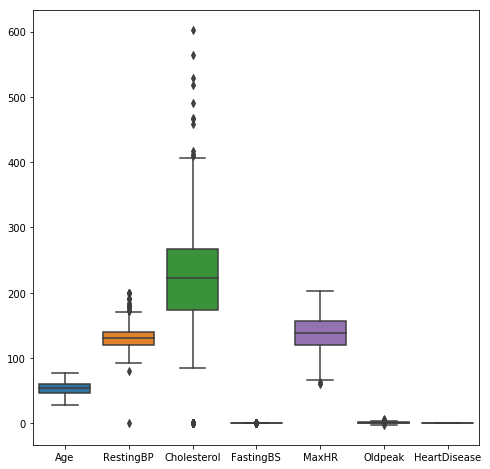

In [95]:
sns.boxplot(data=df)

In [109]:
upper_limit_RestingBP = df.RestingBP.mean() + 3*df.RestingBP.std()
upper_limit_Cholesterol = df.Cholesterol.mean() + 3*df.Cholesterol.std()
upper_limit_FastingBS = df.FastingBS.mean() + 3*df.FastingBS.std()
upper_limit_MaxHR = df.MaxHR.mean() + 3*df.MaxHR.std()
upper_limit_Oldpeak = df.Oldpeak.mean() + 3*df.Oldpeak.std()

In [110]:
lower_limit_RestingBP = df.RestingBP.mean() -3*df.RestingBP.std()
lower_limit_Cholesterol = df.Cholesterol.mean() -3*df.Cholesterol.std()
lower_limit_FastingBS = df.FastingBS.mean() -3*df.FastingBS.std()
lower_limit_MaxHR = df.MaxHR.mean() -3*df.MaxHR.std()
lower_limit_Oldpeak = df.Oldpeak.mean() -3*df.Oldpeak.std()

In [111]:
df1 = df[(df.RestingBP<upper_limit_RestingBP) & (df.RestingBP>lower_limit_RestingBP)]
df2 = df[(df.Cholesterol<upper_limit_Cholesterol) & (df.Cholesterol>lower_limit_Cholesterol)]
df3 = df[(df.FastingBS<upper_limit_FastingBS) & (df.FastingBS>lower_limit_FastingBS)]
df4 = df[(df.MaxHR<upper_limit_MaxHR) & (df.MaxHR>lower_limit_MaxHR)]
df5 = df[(df.Oldpeak<upper_limit_Oldpeak) & (df.Oldpeak>lower_limit_Oldpeak)]

In [116]:
df1.shape

(910, 12)

In [117]:
df2.shape

(915, 12)

In [118]:
df3.shape

(918, 12)

In [119]:
df4.shape

(917, 12)

In [120]:
df5.shape

(911, 12)

In [121]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [123]:
df1.ChestPainType.value_counts()

ASY    492
NAP    201
ATA    171
TA      46
Name: ChestPainType, dtype: int64

In [124]:
df1.RestingECG.value_counts()

Normal    548
LVH       185
ST        177
Name: RestingECG, dtype: int64

In [125]:
df1.ST_Slope.value_counts()

Flat    456
Up      393
Down     61
Name: ST_Slope, dtype: int64

In [126]:
df_new = pd.get_dummies(df1, columns=["Sex",'ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

In [127]:
df_new.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
 from sklearn.preprocessing import StandardScaler

In [128]:
X = df_new.drop("HeartDisease",axis="columns")
y = df_new.HeartDisease

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

C:\Users\vksk0\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vksk0\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.42890987,  0.46290747,  0.823928  , -0.54941769,  1.38770332,
        -0.83127567, -0.51540929,  0.51540929, -1.08491174,  2.07885484,
        -0.53244519, -0.23073955, -0.50514593,  0.81276315, -0.49139943,
         0.82211603, -0.82211603, -0.26804707, -1.00220022,  1.14696191],
       [-0.47583781,  1.62785714, -0.17529461, -0.54941769,  0.75669269,
         0.10947904,  1.94020563, -1.94020563, -1.08491174, -0.48103407,
         1.87812757, -0.23073955, -0.50514593,  0.81276315, -0.49139943,
         0.82211603, -0.82211603, -0.26804707,  0.99780461, -0.87186853],
       [-1.74660056, -0.11956736,  0.76892492, -0.54941769, -1.53072084,
        -0.83127567, -0.51540929,  0.51540929, -1.08491174,  2.07885484,
        -0.53244519, -0.23073955, -0.50514593, -1.23037074,  2.03500441,
         0.82211603, -0.82211603, -0.26804707, -1.00220022,  1.14696191]])

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [131]:
X_train.shape

(682, 20)

In [132]:
X_test.shape

(228, 20)

In [133]:
y_train.value_counts()

1    375
0    307
Name: HeartDisease, dtype: int64

In [138]:
307/375

0.8186666666666667

In [139]:
y_test.value_counts()

1    126
0    102
Name: HeartDisease, dtype: int64

In [140]:
102/126

0.8095238095238095

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.75956284, 0.78021978, 0.79120879, 0.74725275, 0.65745856])

In [142]:
scores.mean()

0.747140544749457

In [143]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.8475073313782991

In [144]:
bag_model.score(X_test, y_test)

0.8903508771929824

In [145]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores

array([0.86338798, 0.80769231, 0.82967033, 0.81868132, 0.72928177])

In [146]:
scores.mean()

0.8097427404283668

In [147]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
scores.mean()

0.8218310506327896